In [46]:
import numpy as np
from keras import datasets
from keras import models, layers
from keras.utils import np_utils
import tensorflow as tf
import matplotlib.pyplot as plt

from keras import backend

In [47]:
# DataLoader
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train.shape # 흑백은 채널이 따로 없지만, CNN을 위해 채널 필요함

(50000, 32, 32, 3)

In [48]:
H, W, C = X_train.shape[1:]

In [49]:
channel = backend.image_data_format()
channel

if channel == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], C, H, W) # X_train.shape[0] 대신에 -1 써도 동일한 표현
    X_test = X_test.reshape(X_test.shape[0], C, H, W)
    input_shape = (C, H, W) # 채널이 앞으로 간다
else:
    X_train = X_train.reshape(X_train.shape[0], H, W, C)
    X_test = X_test.reshape(X_test.shape[0], H, W, C)
    input_shape = (H, W, C) # 채널이 뒤로 간다

In [50]:
# scaling
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [51]:
# y값 전처리하기...One Hot Encoding
print(y_train[0])
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
print(Y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [52]:
# # model 생성...77
# model = models.Sequential()
# model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'))
# model.add(layers.Dropout(0.25))
# model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPool2D(pool_size=(2, 2)))
# model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(layers.Dropout(0.25))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPool2D(pool_size=(2, 2)))
# # 마지막에 1차원으로 펼쳐서 FCN을 만든다.
# model.add(layers.Flatten())
# model.add(layers.Dense(1024, activation='relu'))
# model.add(layers.Dropout(0.4))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dropout(0.4))
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dropout(0.4))
# model.add(layers.Dense(10, activation='softmax'))

In [53]:
# model 생성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
# 마지막에 1차원으로 펼쳐서 FCN을 만든다.
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [54]:
# compile
model.compile('adam', 'categorical_crossentropy', 'accuracy')

In [55]:
# fit&history
history = model.fit(X_train, Y_train, epochs=50, batch_size=128, validation_split=0.2)

Epoch 1/50
313/313 [==============================] - 7s 14ms/step - loss: 2.1883 - accuracy: 0.3180 - val_loss: 2.9108 - val_accuracy: 0.1357
Epoch 2/50
313/313 [==============================] - 4s 12ms/step - loss: 1.2865 - accuracy: 0.5360 - val_loss: 1.0410 - val_accuracy: 0.6278
Epoch 3/50
313/313 [==============================] - 4s 11ms/step - loss: 1.0395 - accuracy: 0.6285 - val_loss: 0.8796 - val_accuracy: 0.6873
Epoch 4/50
313/313 [==============================] - 4s 12ms/step - loss: 0.9029 - accuracy: 0.6808 - val_loss: 0.7739 - val_accuracy: 0.7247
Epoch 5/50
313/313 [==============================] - 4s 11ms/step - loss: 0.8162 - accuracy: 0.7145 - val_loss: 0.8356 - val_accuracy: 0.7132
Epoch 6/50
313/313 [==============================] - 4s 12ms/step - loss: 0.7453 - accuracy: 0.7391 - val_loss: 0.7076 - val_accuracy: 0.7500
Epoch 7/50
313/313 [==============================] - 4s 12ms/step - loss: 0.6955 - accuracy: 0.7591 - val_loss: 0.7293 - val_accuracy: 0.7391

In [56]:
# evaluation
score = model.evaluate(X_test, Y_test)
print("Loss : {}, Accuracy : {}".format(*score))

313/313 [==============================] - 1s 3ms/step - loss: 0.5895 - accuracy: 0.8407
Loss : 0.58954256772995, Accuracy : 0.8406999707221985


In [57]:
# 시각화
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])

def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])

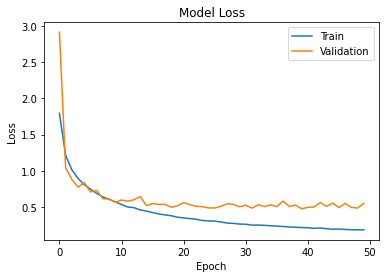

In [58]:
plot_loss(history)

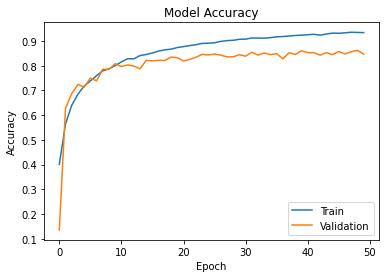

In [59]:
plot_accuracy(history)

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)       